##Import Necessary Libraries


In [103]:
import pandas as pd
import os
import matplotlib.pyplot as plt

##Merge all months of sales data into a single csv file


In [104]:
### Return a list containing the names of the sales csv files. Change name of path to path that contains all csv-files.
path = '/content/csv-files/'
os.listdir(path)

['Sales_December_2019.csv',
 'Sales_January_2019.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_June_2019.csv',
 'Sales_July_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_March_2019.csv',
 'Sales_February_2019.csv',
 'Sales_May_2019.csv',
 'Sales_September_2019.csv']

In [105]:
### Get a list of all csv files in the specified directory

# Make a list with the names of all the csv files
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Create an empty list to store each csv file's data as a DataFrame. Each index of dfs will be a dataframe with the contents of each csv file
dfs = []

# Loop through each csv file, read it into a DataFrame, and append it to the dfs list
for csv_file in csv_files:
    print(csv_file)
    df = pd.read_csv(os.path.join(path, csv_file))
    dfs.append(df)

# Concatenate all DataFrames in the dfs list into a single DataFrame
Yearly_Data = pd.concat(dfs, ignore_index=True)

# Save the concatenated data to a new csv file called all_data.csv
Yearly_Data.to_csv('/content/all_data.csv', index=False)

Sales_December_2019.csv
Sales_January_2019.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_June_2019.csv
Sales_July_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_March_2019.csv
Sales_February_2019.csv
Sales_May_2019.csv
Sales_September_2019.csv


In [106]:
### Read data that has all months sales and save to a pandas df called all_data
all_data=pd.read_csv('/content/all_data.csv')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


##Clean Dataframe


In [107]:
### Replace ' ' with '_' in column names (personal preference)
all_data.columns = [c.replace(' ', '_') for c in all_data.columns]
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [108]:
### Check if headers repeat from multiple file concatenations
length=len(all_data[all_data['Product']=='Product'])
print(length," headers repeat")

355  headers repeat


In [109]:
### Delete repreating headers
org_len=len(all_data)
all_data = all_data[all_data['Product'] != 'Product']
new_len=len(all_data)
print(org_len-new_len, " header rows dropped.")

355  header rows dropped.


In [110]:
### Delete empty rows
org_len=len(all_data)
all_data=all_data.dropna(how='all')
new_len=len(all_data)
print(org_len-new_len, " blank records dropped.")

545  blank records dropped.


In [111]:
### Convert data types
all_data['Quantity_Ordered'] = pd.to_numeric(all_data['Quantity_Ordered'])
all_data['Price_Each'] = pd.to_numeric(all_data['Price_Each'])

# Convert Order_Date into date time format
all_data['Order_Date'] =  pd.to_datetime(all_data['Order_Date'], format='%m/%d/%y %H:%M')

# Show new datatypes
all_data.dtypes


<ipython-input-111-f90747d58735>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity_Ordered'] = pd.to_numeric(all_data['Quantity_Ordered'])


Order_ID                    object
Product                     object
Quantity_Ordered             int64
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

##Question 1: What was the best month for sales and how much money was earned that month?


In [112]:
### Extract month from Order_Date as a new column
all_data['Month'] = pd.DatetimeIndex(all_data['Order_Date']).month

In [113]:
### Create a sum column that mutiplies quantity with price
all_data['Sum']=all_data['Quantity_Ordered']*all_data['Price_Each']

In [114]:
### Lets see our updated all_data
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sum
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


In [115]:
### Find the sum of sales grouped by month
sales_by_month = all_data.groupby('Month')['Sum'].sum()
print(sales_by_month)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sum, dtype: float64


<ipython-input-177-98635c1b0861>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


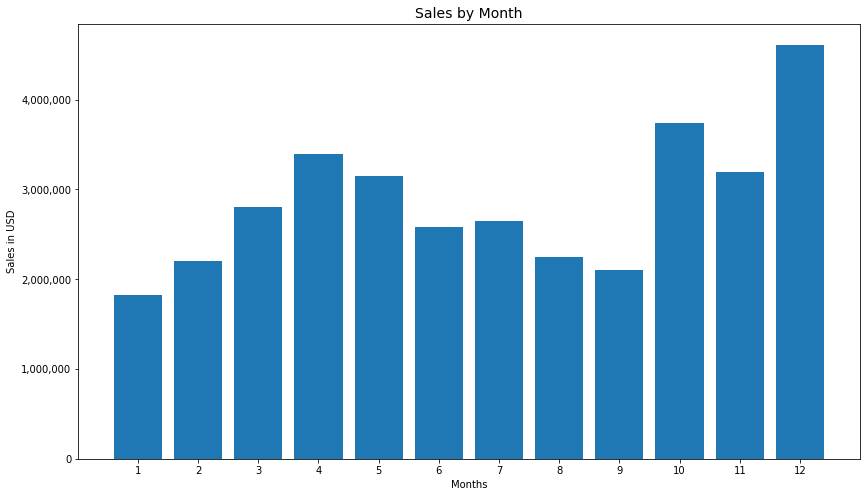

In [177]:
### Lets plot our results

months=range(1,13)
plt.bar(months, sales_by_month)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months')

# After plotting the data, format the y labels to show full number instead of scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Sales by Month', fontsize=14)

plt.show()

The results show that December is the month with the highest sales amount.


##Question 2: What US city had the highest number of sales?

In [117]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sum
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


In [118]:
### We need a new column named 'City', which is extracted from the Purchase_Address
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase_Address'].apply(lambda x: get_city(x)+', '+get_state(x))

In [119]:
### How many unique cities are we looking at?
print(all_data['City'].unique())

[' New York City, NY' ' San Francisco, CA' ' Atlanta, GA' ' Portland, OR'
 ' Dallas, TX' ' Los Angeles, CA' ' Boston, MA' ' Austin, TX'
 ' Portland, ME' ' Seattle, WA']


In [120]:
### What is the breakdown of sales by city?
sales_by_city=all_data.groupby('City')['Sum'].sum()
print(sales_by_city)

City
 Atlanta, GA          2795498.58
 Austin, TX           1819581.75
 Boston, MA           3661642.01
 Dallas, TX           2767975.40
 Los Angeles, CA      5452570.80
 New York City, NY    4664317.43
 Portland, ME          449758.27
 Portland, OR         1870732.34
 San Francisco, CA    8262203.91
 Seattle, WA          2747755.48
Name: Sum, dtype: float64


<ipython-input-178-40f394cfd56a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


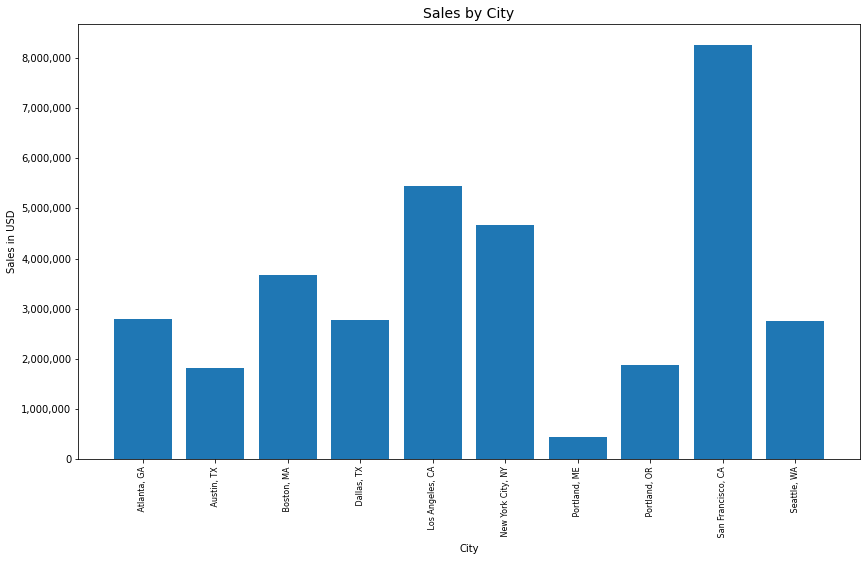

In [178]:
### Lets plot our results

# We need to get cities in same order as the sales_by_city results, so we will use the following method
cities=[city for city, df in all_data.groupby('City')]

plt.bar(cities, sales_by_city)
plt.xticks(cities,rotation='vertical', size=8)
plt.ylabel('Sales in USD')
plt.xlabel('City')

# After plotting the data, format the y labels to show full not number instead of scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Sales by City', fontsize=14)

plt.show()

##Question 3: What time should we display advertisements to maximize the likelihood of selling products


In [122]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sum,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


In [123]:
### We will first extract the time from the Order_Date
all_data['Hour']=all_data['Order_Date'].dt.hour
all_data['Minute']=all_data['Order_Date'].dt.minute
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sum,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


In [124]:
### Distribution of count of orders per hour for all data
orders_by_hour=all_data.groupby('Hour')['Order_ID'].count()
print(orders_by_hour)

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order_ID, dtype: int64


<ipython-input-179-6cc02b00ca6c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


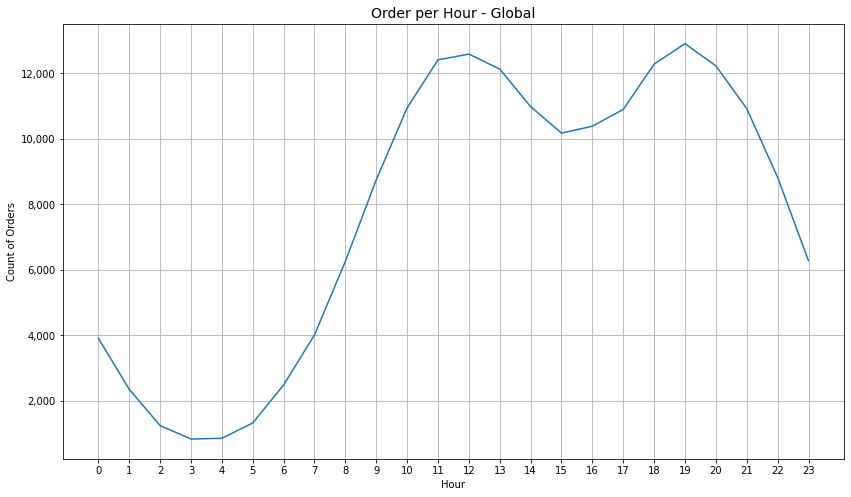

In [179]:
### Lets plot the global results

hours=[hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, orders_by_hour)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.grid()

# Make graph bigger
plt.rcParams["figure.figsize"]=(14, 8)

# After plotting the data, format the y labels to show full number instead of scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('Order per Hour - Global', fontsize=14)

plt.show()

In [126]:
### Lets look at the order by hour per each city to get a better understanding of when customers are placing orders most frequently broken up by city

# Get a list of al the cities to break up our results by
listOfUniques = all_data['City'].unique()

for unique in listOfUniques:
    print('Distribution of orders per hour for: ',unique)
    # Get a filtered dataframe called tempdf that only has rows for the specified city
    tempdf = all_data[ all_data['City'] == unique]
    print(tempdf.groupby('Hour')['Order_ID'].count())

Distribution of orders per hour for:   New York City, NY
Hour
0      557
1      328
2      164
3      100
4      107
5      204
6      336
7      517
8      857
9     1174
10    1454
11    1698
12    1613
13    1628
14    1459
15    1352
16    1426
17    1448
18    1608
19    1753
20    1626
21    1500
22    1153
23     814
Name: Order_ID, dtype: int64
Distribution of orders per hour for:   San Francisco, CA
Hour
0      940
1      570
2      315
3      220
4      217
5      344
6      630
7      989
8     1471
9     2064
10    2695
11    2964
12    2998
13    2865
14    2642
15    2486
16    2484
17    2634
18    2988
19    3106
20    2945
21    2595
22    2108
23    1462
Name: Order_ID, dtype: int64
Distribution of orders per hour for:   Atlanta, GA
Hour
0      310
1      213
2      113
3       57
4       80
5       98
6      192
7      349
8      509
9      735
10     783
11     992
12    1020
13     963
14     887
15     783
16     830
17     896
18     937
19    1047
20     957
21 

<ipython-input-180-bdecb44b410d>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


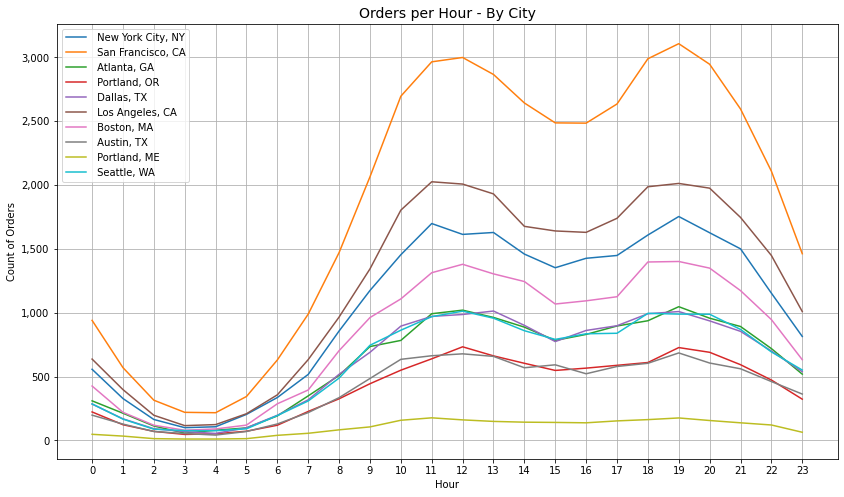

In [180]:
### We will now plot the results on the same plot

listOfUniques = all_data['City'].unique()

# Plot line for each city
for unique in listOfUniques:
    tempdf = all_data[ all_data['City'] == unique]
    hours=[hour for hour, df in tempdf.groupby('Hour')]
    plt.plot(hours, tempdf.groupby('Hour')['Order_ID'].count(), label=unique)
    plt.legend(loc="upper left", prop={'size': 10})
    ###Uncomment this line if you don't want them all on the same graph. 
    ###plt.show()

# Formatting
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.grid()

# Make the plot bigger
plt.rcParams["figure.figsize"]=(14, 8)

# After plotting the data, format the y labels to show full not number instead of scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('Orders per Hour - By City', fontsize=14)

plt.show()

##Question 4: What products are most often solf together?
###Things to focus on tomorrow: Understand the following plots, what is being done and the answer to the question. The . \ are confusing. Then understand how the questions are answered and finally understand how we are getting x and y values to pass in to the plots


In [128]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sum,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


In [129]:
### Is the order_id unique? If not, how many orders have more than one distinct product sold?
print("Rows in dataset: ",all_data.shape[0])
print("Unique rows in ORDER_ID: ",len(all_data['Order_ID'].unique()))
print(all_data.shape[0]-len(all_data['Order_ID'].unique()), " Orders with more than one product")


Rows in dataset:  185950
Unique rows in ORDER_ID:  178437
7513  Orders with more than one product


In [130]:
#How many unique products do we have?
print(len(all_data['Product'].unique())," unique products")

19  unique products


Since the order_id is not unique, each order ID may have mutiple products sold together. In that case, which products get sold together most often? We will explore some other questions before we get to this.

In [131]:
### We don't want to look at the time portion of the order_date so we will add another coulm titled 'Just_Date'
all_data['Just_Date']=all_data['Order_Date'].dt.date
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sum,City,Hour,Minute,Just_Date
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1,2019-12-30
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3,2019-12-29
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21,2019-12-12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13,2019-12-22
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38,2019-12-18


In [167]:
### What is the distribution of number of different items bought per shopping trip?
tempdf=all_data[['Order_ID','Product']]
items_per_shopping=tempdf.groupby('Order_ID')['Product'].count().to_frame()
print("Avg. number of distinct product bought per shopping trip: ",items_per_shopping.Product.mean())

Avg. number of distinct product bought per shopping trip:  1.042104496264788


<ipython-input-176-2e2192961807>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 20000.0, '20,000'),
 Text(0, 40000.0, '40,000'),
 Text(0, 60000.0, '60,000'),
 Text(0, 80000.0, '80,000'),
 Text(0, 100000.0, '100,000'),
 Text(0, 120000.0, '120,000'),
 Text(0, 140000.0, '140,000'),
 Text(0, 160000.0, '160,000'),
 Text(0, 180000.0, '180,000')]

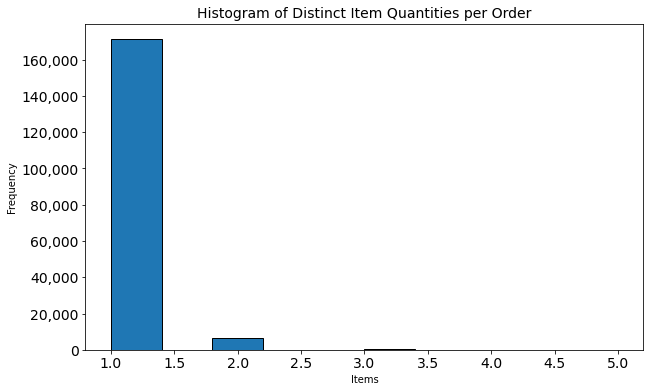

In [176]:
items_per_shopping['Product'].plot(kind='hist', edgecolor='black',figsize=(10,6),legend=False, fontsize=14)
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.title('Histogram of Distinct Item Quantities per Order', fontsize=14)

# After plotting the data, format the y labels to show full not number instead of scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

So, most people are buying one distinct item per shopping trip. (Meaning that 7 AAA batteries doesn't count as 7 items, it counts as 1 item since the item is the same).
Of the people who are buying multiple items per shopping trip, which items are being bought together?

In [169]:
### We will keep only the orders that have duplicate order_ids meaning that more than one distinct item was bought for that order
repeated_order_data=all_data[all_data['Order_ID'].duplicated(keep=False)]

# We will take the product column for each Order ID and concat all products for the order ID into one list
items = repeated_order_data.groupby(['Order_ID']).agg({'Product': lambda x: x.ravel().tolist()}).reset_index()
items.head()

,Order_ID,Product
0,141275,"[USB-C Charging Cable, Wired Headphones]"
1,141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]"
2,141365,"[Vareebadd Phone, Wired Headphones]"
3,141384,"[Google Phone, USB-C Charging Cable]"
4,141450,"[Google Phone, Bose SoundSport Headphones]"


In [170]:
### We will find combinations of items that appear together using itertools 
import itertools
combinations_list = []
for row in items.Product:
    combinations = list(itertools.combinations(row, 2))
    combinations_list.append(combinations)

In [171]:
### We will convert combination list to a pandas df so we can see the top ten items sold together
combination_counts = pd.Series(combinations_list).explode().reset_index(drop=True)
combination_counts.value_counts()[:10]

(iPhone, Lightning Charging Cable)              1005
(Google Phone, USB-C Charging Cable)             987
(iPhone, Wired Headphones)                       447
(Google Phone, Wired Headphones)                 414
(Vareebadd Phone, USB-C Charging Cable)          361
(iPhone, Apple Airpods Headphones)               360
(Google Phone, Bose SoundSport Headphones)       220
(USB-C Charging Cable, Wired Headphones)         160
(Vareebadd Phone, Wired Headphones)              143
(Lightning Charging Cable, Wired Headphones)      92
dtype: int64

##Question 5: What product sold the most and why do you think so?

In [178]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sum,City,Time,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle, WA",22:21:00,22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas, TX",15:11:00,15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,"Portland, OR",14:40:00,14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,"Los Angeles, CA",20:59:00,20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,"New York City, NY",19:53:00,19,53


In [182]:
### We will group by product and have a count of each product
count_per_product=all_data.groupby('Product')['Quantity_Ordered'].sum()
print(count_per_product)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity_Ordered, dtype: int64


<ipython-input-183-e884aaefc6f1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


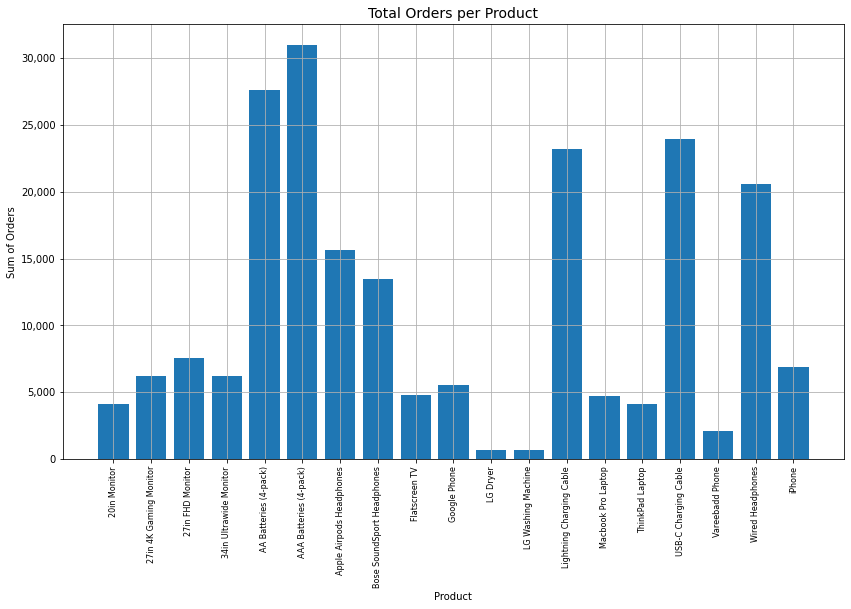

In [183]:
### Lets plot the results
product_group=all_data.groupby('Product')
products=[product for product, df in product_group]
plt.bar(products, count_per_product)

plt.xticks(products,rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Sum of Orders')
plt.grid()
plt.rcParams["figure.figsize"]=(14, 8)

# after plotting the data, format the y labels to show full not number instead of scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('Total Orders per Product', fontsize=14)

plt.show()

One possible explananation as to why certain items, such as the batteries, are bought most frequently is beause of the price of item. The cheaper, more replaceable items are bought more often. Lets test this hypothesis by overlaying the price per item on the same graph


In [187]:
### Lets first get a list of prices for each item
price_per_product=all_data.groupby('Product').mean()['Price_Each']
print(price_per_product)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price_Each, dtype: float64


<ipython-input-188-9f4148bfcb43>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical', size=8)


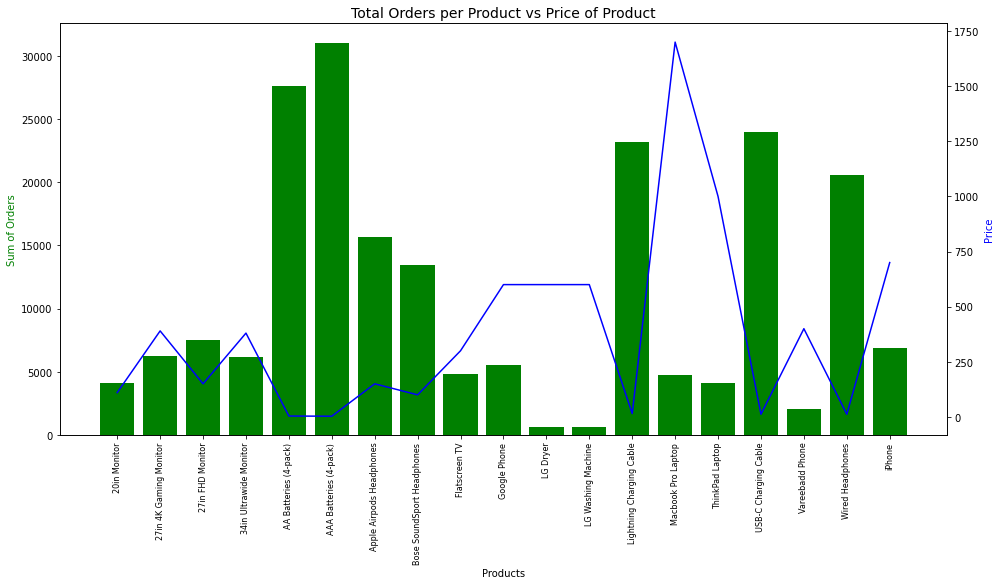

In [188]:
### Make a dual axis chart
fig, ax1 = plt.subplots()
products=[product for product, df in product_group]


ax1.set_xlabel('Products')
ax1.set_ylabel('Sum of Orders', color='g')
ax1.bar(products, count_per_product, color='g')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Price', color='b')  # we already handled the x-label with ax1
ax2.plot(products, price_per_product, color='b')
ax1.set_xticklabels(products,rotation='vertical', size=8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Total Orders per Product vs Price of Product', fontsize=14)

plt.show()


The hypothesis holds in some instances, but doesn't fully explain the reason certain items are being bought more frequently. We can try out more hypothesis such as items that have a shorter lifetime get purchased more often. Nevertheless, this is a good starting point.